<a href="https://colab.research.google.com/github/KietHuynh02/EXERCISE_WEEK_4/blob/main/MobileRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=0b237222cc9c171d9ebd283412508af8743300254f72a5c82875fd817912ce53
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


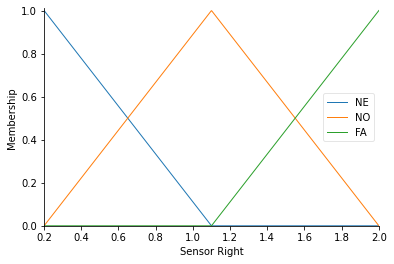

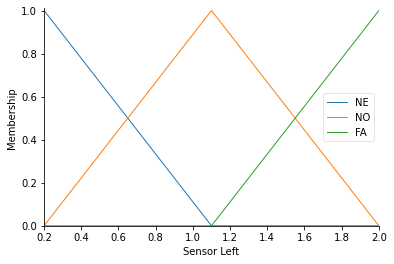

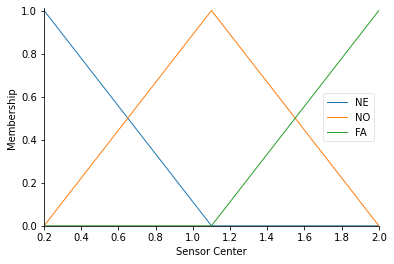

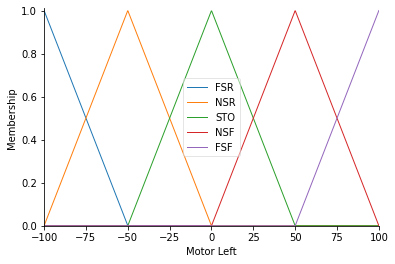

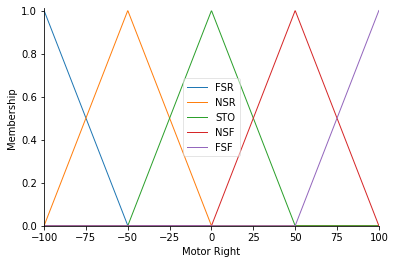

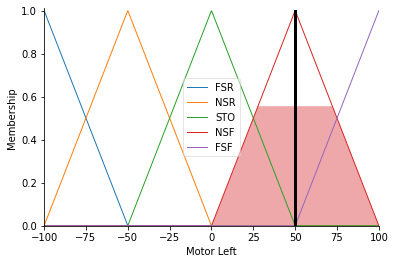

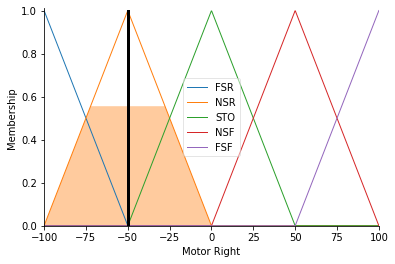

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universeS = np.linspace(0.2,2,1000)
universeM = np.linspace(-100,100,1000)

#Input
SR=ctrl.Antecedent(universeS,'Sensor Right')
SL=ctrl.Antecedent(universeS,'Sensor Left')
SC=ctrl.Antecedent(universeS,'Sensor Center')
#Output
ML=ctrl.Consequent(universeM,'Motor Left')
MR=ctrl.Consequent(universeM,'Motor Right')

nameS=['NE','NO','FA']
nameM=['FSR','NSR','STO','NSF','FSF']

SR.automf(names=nameS)
SL.automf(names=nameS)
SC.automf(names=nameS)
ML.automf(names=nameM)
MR.automf(names=nameM)

ruleML = []

#Rule ML
ruleML.append(ctrl.Rule(antecedent=((SL['FA'] & SC['FA']& SR['FA'])|(SL['NO'] & SC['FA']& SR['FA'])|(SL['NO'] & SC['FA']& SR['NO'])|
                                  (SL['NO'] & SC['FA']& SR['NE'])|(SL['NE'] & SC['FA']& SR['FA'])|(SL['NE'] & SC['FA']& SR['NO'])|
                                  (SL['NE'] & SC['FA']& SR['NE'])),consequent=ML['FSF'],label='rule FSF'))
ruleML.append(ctrl.Rule(antecedent=((SL['FA'] & SC['NO']& SR['FA'])|(SL['FA'] & SC['FA']& SR['NO'])|(SL['FA'] & SC['NO']& SR['NO'])|
                                  (SL['NO'] & SC['NO']& SR['FA'])|(SL['NO'] & SC['NE']& SR['FA'])|(SL['NO'] & SC['NE']& SR['NO'])|
                                  (SL['NE'] & SC['NO']& SR['FA'])|(SL['NE'] & SC['NE']& SR['FA'])|(SL['NE'] & SC['NO']& SR['NO'])|
                                  (SL['NE'] & SC['NO']& SR['NE'])|(SL['NE'] & SC['NE']& SR['NO'])),consequent=ML['NSF'],label='rule NSF'))
ruleML.append(ctrl.Rule(antecedent=((SL['FA'] & SC['FA']& SR['NE'])|(SL['FA'] & SC['NE']& SR['FA'])|(SL['FA'] & SC['NE']& SR['NO'])|
                                  (SL['FA'] & SC['NO']& SR['NE'])|(SL['FA'] & SC['NE']& SR['NE'])|(SL['NO'] & SC['NO']& SR['NO'])|
                                  (SL['NO'] & SC['NO']& SR['NE'])|(SL['NO'] & SC['NE']& SR['NE'])),consequent=ML['NSR'],label='rule NSR'))
ruleML.append(ctrl.Rule(antecedent=((SL['NE'] & SC['NE']& SR['NE'])),consequent=ML['FSR'],label='rule FSR'))
#Rule MR
ruleMR = []
ruleMR.append(ctrl.Rule(antecedent=((SL['FA'] & SC['FA']& SR['FA'])|(SL['FA'] & SC['FA']& SR['NO'])|(SL['FA'] & SC['NO']& SR['NO'])|
                                  (SL['NO'] & SC['FA']& SR['NO'])|(SL['NO'] & SC['FA']& SR['NE'])|(SL['NE'] & SC['FA']& SR['NO'])|
                                  (SL['NE'] & SC['FA']& SR['NE'])),consequent=MR['FSF'],label='rule FSF'))
ruleMR.append(ctrl.Rule(antecedent=((SL['FA'] & SC['NO']& SR['FA'])|(SL['FA'] & SC['FA']& SR['NE'])|(SL['FA'] & SC['NE']& SR['FA'])|
                                  (SL['FA'] & SC['NE']& SR['NO'])|(SL['FA'] & SC['NO']& SR['NE'])|(SL['FA'] & SC['NE']& SR['NE'])|
                                  (SL['NO'] & SC['FA']& SR['FA'])|(SL['NO'] & SC['NO']& SR['NE'])|(SL['NO'] & SC['NE']& SR['NE'])|
                                  (SL['NE'] & SC['FA']& SR['FA'])|(SL['NE'] & SC['NO']& SR['NE'])),consequent=MR['NSF'],label='rule NSF'))
ruleMR.append(ctrl.Rule(antecedent=((SL['NO'] & SC['NO']& SR['FA'])|(SL['NO'] & SC['NE']& SR['FA'])|(SL['NO'] & SC['NO']& SR['NO'])|
                                  (SL['NO'] & SC['NE']& SR['NO'])|(SL['NE'] & SC['NO']& SR['FA'])|(SL['NE'] & SC['NE']& SR['FA'])|
                                  (SL['NE'] & SC['NO']& SR['NO'])|(SL['NE'] & SC['NE']& SR['NO'])),consequent=MR['NSR'],label='rule NSR'))
ruleMR.append(ctrl.Rule(antecedent=((SL['NE'] & SC['NE']& SR['NE'])),consequent=MR['FSR'],label='rule FSR'))

#Control system
motorL_ctrl = ctrl.ControlSystem(ruleML)
motorL_simulation=ctrl.ControlSystemSimulation(motorL_ctrl)
motorR_ctrl = ctrl.ControlSystem(ruleMR)
motorR_simulation=ctrl.ControlSystemSimulation(motorR_ctrl)
# Compute
motorL_simulation.input['Sensor Right'] = 1.7
motorR_simulation.input['Sensor Right'] = 1.5
motorL_simulation.input['Sensor Left'] = 0.2
motorR_simulation.input['Sensor Left'] = 0.2
motorL_simulation.input['Sensor Center'] = 0.8
motorR_simulation.input['Sensor Center'] = 0.6

motorR_simulation.compute()
motorL_simulation.compute()

SR.view()
SL.view()
SC.view()
ML.view()
MR.view()

# power
ML.view(sim = motorL_simulation)
MR.view(sim = motorR_simulation)